In [46]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np     
import csv 
import copy 
import random
import pandas as pd
import xlrd
import matplotlib.pyplot as plt 
import scipy
from scipy import stats
from sklearn.preprocessing import normalize
from pandas import read_csv
import sklearn
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

from sklearn.preprocessing import StandardScaler
import seaborn as sns

#from geneticalgorithm import geneticalgorithm as ga
from geneticalgorithm2 import geneticalgorithm2 as ga # for creating and running optimization model
from geneticalgorithm2 import Crossover, Mutations, Selection # classes for specific mutation and crossover behavior
from geneticalgorithm2 import Population_initializer # for creating better start population
from geneticalgorithm2 import np_lru_cache # for cache function (if u want)
from geneticalgorithm2 import plot_pop_scores # for plotting population scores, if u want
from geneticalgorithm2 import Callbacks # simple callbacks
from geneticalgorithm2 import Actions, ActionConditions, MiddleCallbacks # middle callbacks


In [10]:
###  Read Data  ###

!wget https://github.com/mannodiarun/perovs_dft_ml/blob/dde2e6420835d752d5af89111cb849e8f5e5fdfd/Data.xlsx

##  Choose Dataset Type  ##
Data = 'PBE'
#Data = 'HSE'
#Data = 'PBE_and_HSE'

##  Choose Descriptor Type  ##
Desc = 'Composition Only'
#Desc = 'Elemental Only'
#Desc = 'Composition and Elemental'


if Data == 'PBE':
    D = pd.read_excel('Data.xlsx', 'PBE', engine='xlrd')
    df = pd.DataFrame(D)
    Index = df.Index
    Formula = df.Formula
    Decomp = df.Decomp
    Gap = df.Gap
    SLME = df.SLME
    Comp_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I'])
    Elem_desc = pd.DataFrame(D, columns=['A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
    All_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
    
    
if Data == 'HSE':
    D = pd.read_excel('Data.xlsx', 'HSE')
    df = pd.DataFrame(D)
    Index = df.Index
    Formula = df.Formula
    Decomp = df.Decomp
    Gap = df.Gap
    SLME = df.SLME
    Comp_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I'])
    Elem_desc = pd.DataFrame(D, columns=['A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
    All_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
    
    
if Data == 'PBE_and_HSE':
    D = pd.read_excel('Data.xlsx', 'PBE_and_HSE')
    df = pd.DataFrame(D)
    Index = df.Index
    Formula = df.Formula
    Decomp = df.Decomp
    Gap = df.Gap
    SLME = df.SLME
    Comp_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'PBE', 'HSE'])
    Elem_desc = pd.DataFrame(D, columns=['PBE', 'HSE', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
    All_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'PBE', 'HSE', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])


if Desc == 'Composition Only':
    X = copy.deepcopy(Comp_desc)
if Desc == 'Elemental Only':
    X = copy.deepcopy(Elem_desc)
if Desc == 'Composition and Elemental':
    X = copy.deepcopy(All_desc)
    
n = Index.size
m = int(X.size/n)
X_fl = np.array(X, dtype="float32")


--2022-11-14 19:27:47--  https://github.com/mannodiarun/perovs_dft_ml/blob/dde2e6420835d752d5af89111cb849e8f5e5fdfd/Data.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Data.xlsx.11’

Data.xlsx.11            [ <=>                ] 134.25K  --.-KB/s    in 0.01s   

2022-11-14 19:27:47 (11.5 MB/s) - ‘Data.xlsx.11’ saved [137475]



XLRDError: ignored

In [68]:
# excel_path = "https://github.com/mannodiarun/perovs_dft_ml/blob/7d8ef50fa6a83820fffbf72fbfaadf30e1576e5b/PBE_data.xlsx"

# !wget https://github.com/mannodiarun/perovs_dft_ml/blob/ec16c93b20ce9ec571b35ed16730398655f3ebaa/Data.xls

# !wget https://raw.githubusercontent.com/Regression-on-DFT-Data/Data_norm.csv

!wget https://github.com/mannodiarun/perovs_dft_ml/blob/7d8ef50fa6a83820fffbf72fbfaadf30e1576e5b/PBE_data.csv

D = pd.read_csv("PBE_data.csv", header=None, delimiter="\t")
df = pd.DataFrame(D)
#Index = df.Ind
# Formula = df.Formula
# Decomp = df.Decomp
# Gap = df.Gap
# SLME = df.SLME
# Comp_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I'])
# Elem_desc = pd.DataFrame(D, columns=['A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])
# All_desc = pd.DataFrame(D, columns=['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period'])

df

#pd.read_excel(excel_path, engine='xlrd')

#D = pd.read_excel('Data.xlsx', engine='openpyxl')

#df_list = pd.read_excel('Data.xlsx')
#df = pd.DataFrame(df_list[0])


--2022-11-14 20:25:03--  https://github.com/mannodiarun/perovs_dft_ml/blob/7d8ef50fa6a83820fffbf72fbfaadf30e1576e5b/PBE_data.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘PBE_data.csv.15’

PBE_data.csv.15         [ <=>                ]   1.04M  --.-KB/s    in 0.05s   

2022-11-14 20:25:03 (21.9 MB/s) - ‘PBE_data.csv.15’ saved [1086954]



ParserError: ignored

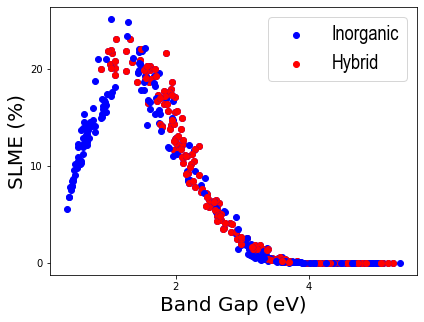

In [ ]:
###   Data Visualization    ###

fig = plt.subplots( figsize=(6,6) )
plt.subplots_adjust(left=0.11, bottom=0.24, right=0.96, top=0.86, wspace=0.30, hspace=0.40)
plt.rc('font', family='Arial narrow')
prop1 = Gap
prop2 = SLME*100

for i in range(0,n):
    plt.scatter(prop1[i] , prop2[i], c='b', label='_nolegend_')
    if df.MA[i] > 0.0 or df.FA[i] > 0.0:
        plt.scatter(prop1[i] , prop2[i], c='r', label='_nolegend_')
plt.scatter(prop1[0], prop2[0], c='b', label='Inorganic')
plt.scatter(prop1[0], prop2[0], c='r', label='Hybrid')
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.xlabel('Band Gap (eV)', c='k', fontsize=20)
plt.ylabel('SLME (%)', c='k', fontsize=20)
plt.legend(loc='upper right', ncol=1, frameon=True, prop={'family':'Arial narrow','size':20})



[5.14213493e-01 3.02967505e-01 1.13988862e-01 4.84559462e-02
 8.06981405e-03 5.00073954e-03 4.27614507e-03 2.89317272e-03
 1.00874223e-04 1.79924160e-05 1.54556888e-05 1.04038562e-13
 7.36186979e-14 6.57121962e-14 5.78697047e-14 5.65763487e-14
 5.39674655e-14 4.93715387e-14 4.39316879e-14 4.18836011e-14
 4.11577512e-14 3.91758246e-14 3.72783155e-14 3.56491015e-14
 3.07614950e-14 3.06665016e-14 2.77513987e-14 2.16489538e-14
 1.56081643e-14 9.89579786e-15 5.62053534e-15 4.62586065e-15
 1.69571714e-15 6.26051911e-19 1.01410730e-31 2.72426551e-33]
[1.13865037e+04 8.74010569e+03 5.36105013e+03 3.49536230e+03
 1.42642986e+03 1.12288628e+03 1.03835265e+03 8.54094332e+02
 1.59480930e+02 6.73540013e+01 6.24256167e+01 5.12171997e-03
 4.30836734e-03 4.07044274e-03 3.81983226e-03 3.77690548e-03
 3.68879627e-03 3.52823083e-03 3.32818611e-03 3.24968051e-03
 3.22139869e-03 3.14287951e-03 3.06582103e-03 2.99807818e-03
 2.78498191e-03 2.78067848e-03 2.64521573e-03 2.33634576e-03
 1.98378487e-03 1.57958

Text(0, 0.5, 'PC2')

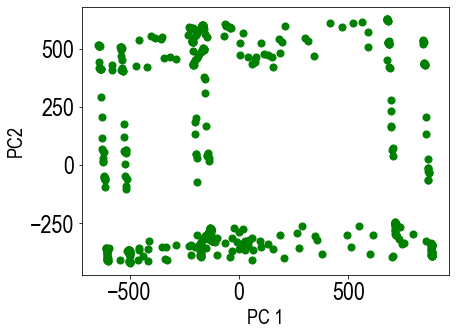

In [ ]:
###   Dimensionality Reduction: Principal Component Analysis (PCA)    ###


pca = PCA(svd_solver='full')
#pca = PCA(n_components=1, svd_solver='arpack')

pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


fig = plt.subplots( figsize=(6,6) )
plt.subplots_adjust(left=0.11, bottom=0.24, right=0.96, top=0.86, wspace=0.30, hspace=0.40)
plt.rc('font', family='Arial narrow')

# x = np.arange(0,m)
# plt.bar(x[:], pca.explained_variance_ratio_[:], color ='r', width = 0.9, edgecolor ='grey', align='center')
# plt.rc('xtick', labelsize=24)
# plt.rc('ytick', labelsize=24)
# plt.xlabel('PC Number', c='k', fontsize=20)
# plt.ylabel('Explained Variance', c='k', fontsize=20)

X_p = pca.transform(X)
plt.scatter(X_p[:,0], X_p[:,1], c='g', marker='o', s=50)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.xlabel('PC 1', c='k', fontsize=20)
plt.ylabel('PC2', c='k', fontsize=20)


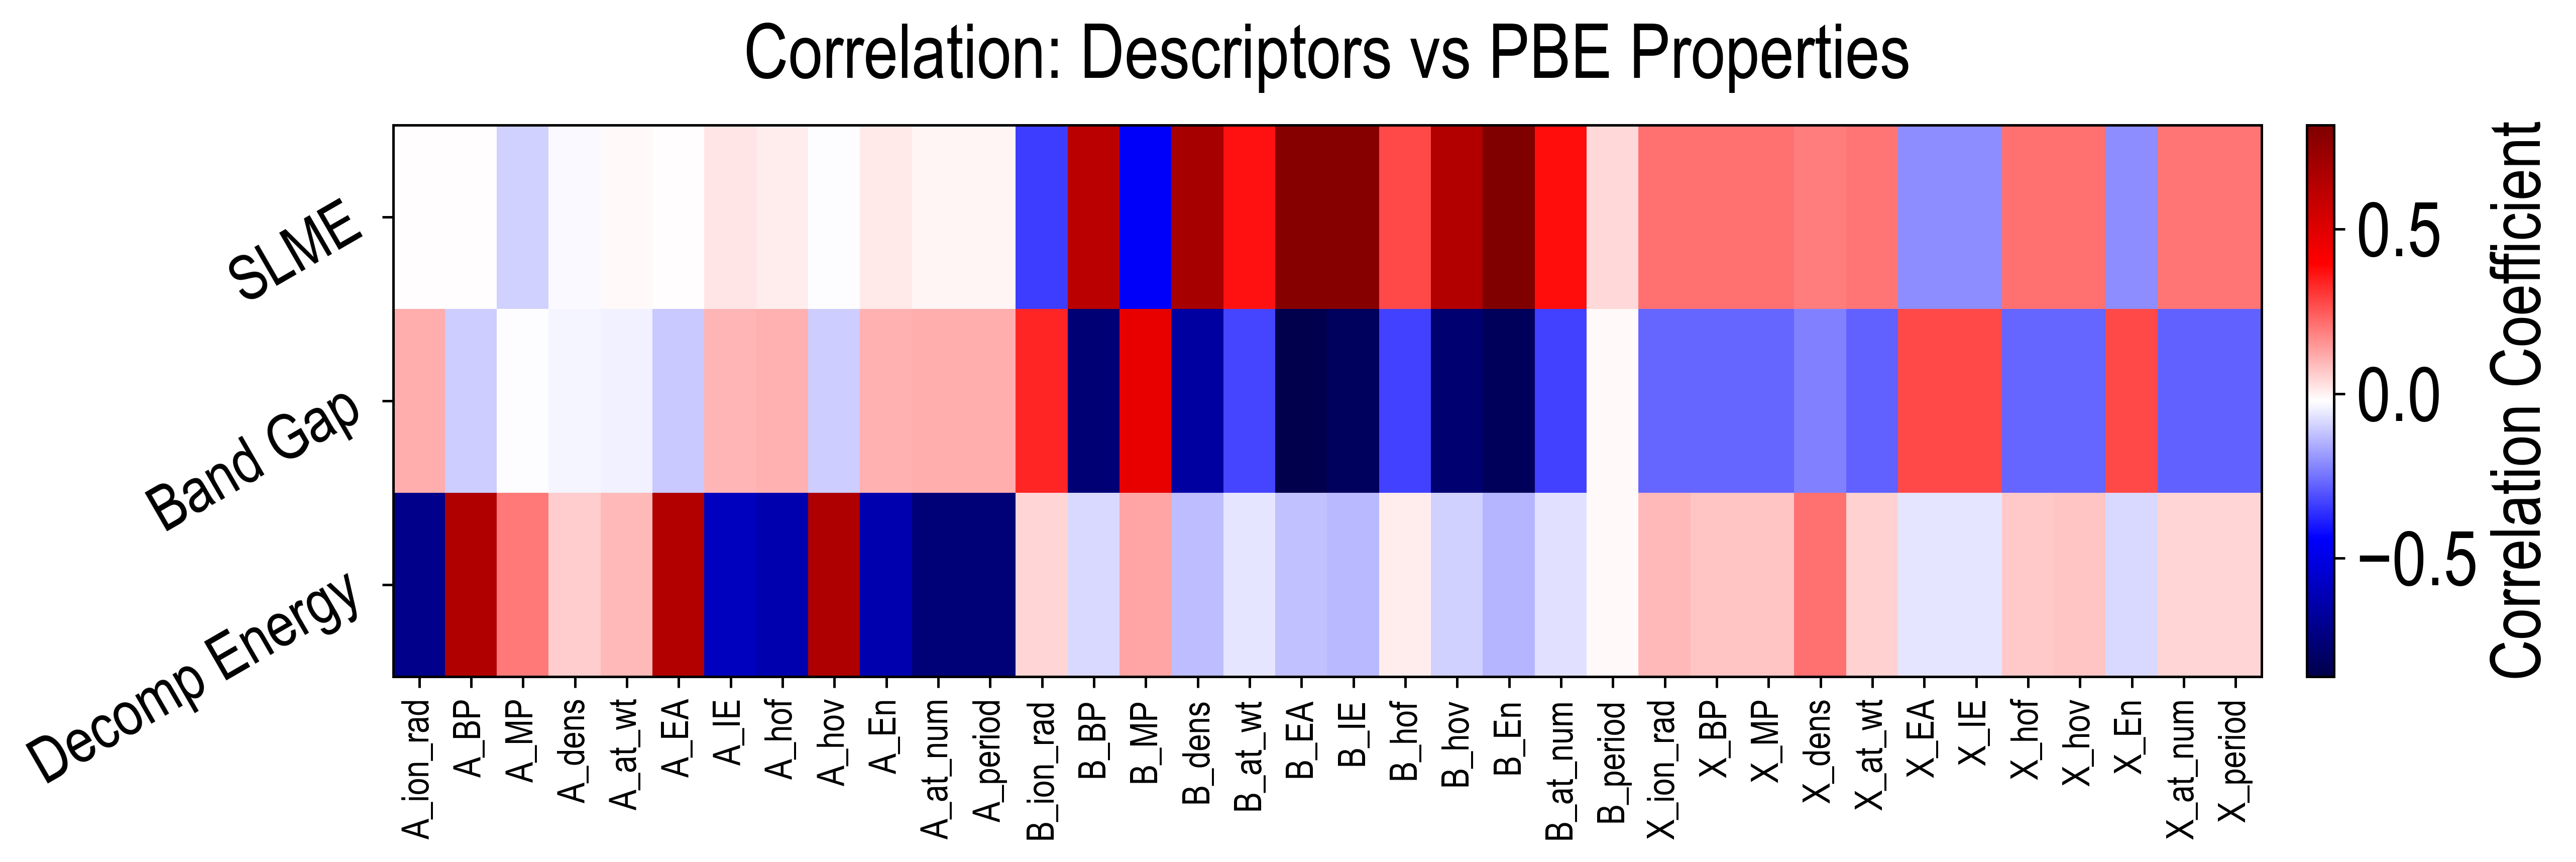

In [ ]:
###   Pearson Coefficient of Linear Correlation    ###


Corr = [[0.0 for a in range(m)] for b in range(3)]

for i in range(0,m):
    x = stats.pearsonr(X_fl[:,i], Decomp[:])
    Corr[0][i] = x[0]
    x = stats.pearsonr(X_fl[:,i], Gap[:])
    Corr[1][i] = x[0]
    x = stats.pearsonr(X_fl[:,i], SLME[:])
    Corr[2][i] = x[0]

    
x = np.arange(m)
xx = [0.0]*m
for i in range(0,m):
    xx[i] = x[i]+0.5
y = [0.5,1.5,2.5]
f = 16
r = 75
Prop = ['Decomp Energy', 'Band Gap', 'SLME']


scale = ['linear']
plotposition = [131, 132, 133]

fig=plt.figure(figsize=(12,4),dpi=450)
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='Arial narrow')
plt.subplots_adjust(left=0.21, right=1.04, top=0.85, bottom=0.24, wspace=0.2, hspace=0.2)

ax = plt.plot(plotposition[0])
plt.plot(plotposition[0])
plt.xscale(scale[0])
plt.yscale(scale[0])
plt.xlim([0,m])
plt.ylim([0,3])

#Labels = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I']
Labels = ['A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period']
#Labels = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt', 'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad', 'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En', 'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens', 'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num', 'X_period']

plt.xticks(xx[0:m], Labels[0:m], rotation=90, fontsize=12)

plt.yticks(y[:], Prop[:], rotation=30, fontsize=20)
plt.title('Correlation: Descriptors vs PBE Properties', fontname='Arial narrow', size=24, horizontalalignment='center', pad=15)
plt.pcolor(Corr, cmap='seismic')
cbar = plt.colorbar(orientation="vertical", pad=0.02)
cbar.set_label(label='Correlation Coefficient', size=22)



In [ ]:
###  Training-Test Split  ###

t = 0.20

X_train, X_test, Prop_decomp_train, Prop_decomp_test, Prop_gap_train, Prop_gap_test, Prop_slme_train, Prop_slme_test = train_test_split(X, Decomp, Gap, SLME, test_size=t)

n_tr = Prop_gap_train.size
n_te = Prop_gap_test.size

X_train_fl = np.array(X_train, dtype="float32")
Prop_decomp_train_fl = np.array(Prop_decomp_train, dtype="float32")
Prop_gap_train_fl = np.array(Prop_gap_train, dtype="float32")
Prop_slme_train_fl = np.array(Prop_slme_train, dtype="float32")

X_test_fl = np.array(X_test, dtype="float32")
Prop_decomp_test_fl = np.array(Prop_decomp_test, dtype="float32")
Prop_gap_test_fl = np.array(Prop_gap_test, dtype="float32")
Prop_slme_test_fl = np.array(Prop_slme_test, dtype="float32")



In [ ]:
###  Define Elastic Net Regression Hyperparameter Space  ###

param_grid = {
#"tol": [1e2],
"alpha": [5000],
#"l1_ratio": [0.5],
#"max_iter": [1000]
}

#param_grid = {}


#  Train Model For Decomposition Energy ##

elast_decomp = GridSearchCV(ElasticNet(), param_grid=param_grid, cv=5)

elast_decomp.fit(X_train_fl, Prop_decomp_train_fl)
Pred_train = elast_decomp.predict(X_train_fl)
Pred_test = elast_decomp.predict(X_test_fl)
#Pred_out = elast_decomp.predict(X_out_fl)

Pred_decomp_train_fl = np.array(Pred_train, dtype="float32")
Pred_decomp_test_fl = np.array(Pred_test, dtype="float32")
#Pred_decomp_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_test_fl, Pred_decomp_test_fl) )
rmse_train_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_train_fl, Pred_decomp_train_fl) )
print('rmse_test_decomp = ', rmse_test_decomp)
print('rmse_train_decomp = ', rmse_train_decomp)


#  Train Model For Band Gap ##

elast_gap = GridSearchCV(ElasticNet(), param_grid=param_grid, cv=5)

elast_gap.fit(X_train_fl, Prop_gap_train_fl)
Pred_train = elast_gap.predict(X_train_fl)
Pred_test = elast_gap.predict(X_test_fl)
#Pred_out = elast_gap.predict(X_out_fl)

Pred_gap_train_fl = np.array(Pred_train, dtype="float32")
Pred_gap_test_fl = np.array(Pred_test, dtype="float32")
#Pred_gap_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_test_fl, Pred_gap_test_fl) )
rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_train_fl, Pred_gap_train_fl) )
print('rmse_test_gap = ', rmse_test_gap)
print('rmse_train_gap = ', rmse_train_gap)


#  Train Model For PV SLME ##

elast_slme = GridSearchCV(ElasticNet(), param_grid=param_grid, cv=5)

elast_slme.fit(X_train_fl, Prop_slme_train_fl)
Pred_train = elast_slme.predict(X_train_fl)
Pred_test = elast_slme.predict(X_test_fl)
#Pred_out = elast_slme.predict(X_out_fl)

Pred_slme_train_fl = np.array(Pred_train, dtype="float32")
Pred_slme_test_fl = np.array(Pred_test, dtype="float32")
#Pred_slme_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_slme = np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_test_fl, Pred_slme_test_fl) )
rmse_train_slme = np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_train_fl, Pred_slme_train_fl) )
print('rmse_test_slme = ', rmse_test_slme)
print('rmse_train_slme = ', rmse_train_slme)



rmse_test_decomp =  1.043486
rmse_train_decomp =  1.1678439
rmse_test_gap =  1.3631775
rmse_train_gap =  1.2758017
rmse_test_slme =  0.07448043
rmse_train_slme =  0.07654947


In [ ]:
###  Define Random Forest Hyperparameter Space  ###

param_grid = {
"n_estimators": [100, 200, 500],
"max_features": [6, 10, m],
"min_samples_leaf": [5,10,20],
"max_depth": [5,10,15],
"min_samples_split": [2, 5, 10]
}

param_grid = { "n_estimators": [100, 200], "max_depth": [10,15], "min_samples_split": [5, 10] }



#  Train Model For Decomposition Energy ##

rfr_decomp = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)

rfr_decomp.fit(X_train_fl, Prop_decomp_train_fl)
Pred_train = rfr_decomp.predict(X_train_fl)
Pred_test = rfr_decomp.predict(X_test_fl)
#Pred_out = rfr_decomp.predict(X_out_fl)

Pred_decomp_train_fl = np.array(Pred_train, dtype="float32")
Pred_decomp_test_fl = np.array(Pred_test, dtype="float32")
#Pred_decomp_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_test_fl, Pred_decomp_test_fl) )
rmse_train_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_train_fl, Pred_decomp_train_fl) )
print('rmse_test_decomp = ', rmse_test_decomp)
print('rmse_train_decomp = ', rmse_train_decomp)


#  Train Model For Band Gap ##

rfr_gap = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)

rfr_gap.fit(X_train_fl, Prop_gap_train_fl)
Pred_train = rfr_gap.predict(X_train_fl)
Pred_test = rfr_gap.predict(X_test_fl)
#Pred_out = rfr_gap.predict(X_out_fl)

Pred_gap_train_fl = np.array(Pred_train, dtype="float32")
Pred_gap_test_fl = np.array(Pred_test, dtype="float32")
#Pred_gap_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_test_fl, Pred_gap_test_fl) )
rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_train_fl, Pred_gap_train_fl) )
print('rmse_test_gap = ', rmse_test_gap)
print('rmse_train_gap = ', rmse_train_gap)


#  Train Model For PV SLME ##

rfr_slme = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)

rfr_slme.fit(X_train_fl, Prop_slme_train_fl)
Pred_train = rfr_slme.predict(X_train_fl)
Pred_test = rfr_slme.predict(X_test_fl)
#Pred_out = rfr_slme.predict(X_out_fl)

Pred_slme_train_fl = np.array(Pred_train, dtype="float32")
Pred_slme_test_fl = np.array(Pred_test, dtype="float32")
#Pred_slme_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_slme = np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_test_fl, Pred_slme_test_fl) )
rmse_train_slme = np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_train_fl, Pred_slme_train_fl) )
print('rmse_test_slme = ', rmse_test_slme)
print('rmse_train_slme = ', rmse_train_slme)



rmse_test_decomp =  0.17697994
rmse_train_decomp =  0.107589066
rmse_test_gap =  0.36623463
rmse_train_gap =  0.20927712
rmse_test_slme =  0.018117385
rmse_train_slme =  0.011636522


In [ ]:
###  Define Kernel Ridge Regression Hyperparameter Space  ###

param_grid = {
#"alpha": [1e0, 1e-1, 1e-2, 1e-3],
#"alpha": [10],
"kernel": [ExpSineSquared(l, p)
            for l in np.logspace(-2, 2, 10)
            for p in np.logspace(0, 2, 10)]
}


#  Train Model For Decomposition Energy ##

krr_decomp = GridSearchCV(KernelRidge(), param_grid=param_grid, cv=5)

krr_decomp.fit(X_train_fl, Prop_decomp_train_fl)
Pred_train = krr_decomp.predict(X_train_fl)
Pred_test = krr_decomp.predict(X_test_fl)
#Pred_out = krr_decomp.predict(X_out_fl)

Pred_decomp_train_fl = np.array(Pred_train, dtype="float32")
Pred_decomp_test_fl = np.array(Pred_test, dtype="float32")
#Pred_decomp_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_test_fl, Pred_decomp_test_fl) )
rmse_train_decomp = np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_train_fl, Pred_decomp_train_fl) )
print('rmse_test_decomp = ', rmse_test_decomp)
print('rmse_train_decomp = ', rmse_train_decomp)


#  Train Model For Band Gap ##

krr_gap = GridSearchCV(KernelRidge(), param_grid=param_grid, cv=5)

krr_gap.fit(X_train_fl, Prop_gap_train_fl)
Pred_train = krr_gap.predict(X_train_fl)
Pred_test = krr_gap.predict(X_test_fl)
#Pred_out = krr_gap.predict(X_out_fl)

Pred_gap_train_fl = np.array(Pred_train, dtype="float32")
Pred_gap_test_fl = np.array(Pred_test, dtype="float32")
#Pred_gap_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_test_fl, Pred_gap_test_fl) )
rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_train_fl, Pred_gap_train_fl) )
print('rmse_test_gap = ', rmse_test_gap)
print('rmse_train_gap = ', rmse_train_gap)


#  Train Model For PV SLME ##

krr_slme = GridSearchCV(KernelRidge(), param_grid=param_grid, cv=5)

krr_slme.fit(X_train_fl, Prop_slme_train_fl)
Pred_train = krr_slme.predict(X_train_fl)
Pred_test = krr_slme.predict(X_test_fl)
#Pred_out = krr_slme.predict(X_out_fl)

Pred_slme_train_fl = np.array(Pred_train, dtype="float32")
Pred_slme_test_fl = np.array(Pred_test, dtype="float32")
#Pred_slme_out_fl = np.array(Pred_out, dtype="float32")

rmse_test_slme = np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_test_fl, Pred_slme_test_fl) )
rmse_train_slme = np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_train_fl, Pred_slme_train_fl) )
print('rmse_test_slme = ', rmse_test_slme)
print('rmse_train_slme = ', rmse_train_slme)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/l

KeyboardInterrupt: 

In [ ]:
print('rmse_test_decomp = ', rmse_test_decomp)
print('rmse_train_decomp = ', rmse_train_decomp)

print('rmse_test_gap = ', rmse_test_gap)
print('rmse_train_gap = ', rmse_train_gap)

print('rmse_test_slme = ', rmse_test_slme)
print('rmse_train_slme = ', rmse_train_slme)


rmse_test_decomp =  0.22340502
rmse_train_decomp =  0.1181294
rmse_test_gap =  0.35276175
rmse_train_gap =  0.1634518
rmse_test_slme =  0.033509105
rmse_train_slme =  0.014155951


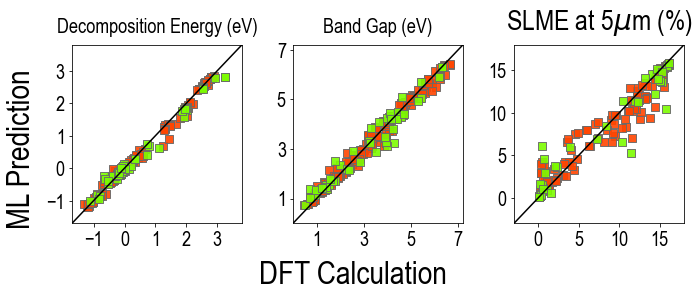

In [ ]:
#  ML Parity Plots ##

if Data == 'PBE':

    fig, ( [ax1, ax2, ax3] ) = plt.subplots( nrows=1, ncols=3, figsize=(10,4) )
    fig.text(0.5, 0.03, 'DFT Calculation', ha='center', fontsize=32)
    fig.text(0.02, 0.5, 'ML Prediction', va='center', rotation='vertical', fontsize=32)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.96, top=0.86, wspace=0.30, hspace=0.40)
    plt.rc('font', family='Arial narrow')
    a = [-175,0,125]
    b = [-175,0,125]

    Prop_train_temp = copy.deepcopy(Prop_decomp_train_fl)
    Pred_train_temp = copy.deepcopy(Pred_decomp_train_fl)
    Prop_test_temp  = copy.deepcopy(Prop_decomp_test_fl)
    Pred_test_temp  = copy.deepcopy(Pred_decomp_test_fl)
    ax1.plot(b, a, c='k', ls='-')
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.scatter(Prop_train_temp[:], Pred_train_temp[:], c='orangered', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Training')
    ax1.scatter(Prop_test_temp[:], Pred_test_temp[:], c='lawngreen', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Test')
    te = '%.2f' % rmse_test_decomp
    tr = '%.2f' % rmse_train_decomp
    ax1.text(0.58, -0.65, 'Test_rmse = ' + te + ' eV', c='navy', fontsize=12)
    ax1.text(0.45, -1.19, 'Train_rmse = ' + tr + ' eV', c='navy', fontsize=12)
    ax1.set_ylim([-1.7, 3.8])
    ax1.set_xlim([-1.7, 3.8])
    ax1.set_xticks([-1.0, 0.0, 1.0, 2.0, 3.0])
    ax1.set_yticks([-1.0, 0.0, 1.0, 2.0, 3.0])
    ax1.set_title('Decomposition Energy (eV)', c='k', fontsize=20, pad=12)
    #ax1.legend(loc='upper left',ncol=1, frameon=True, prop={'family':'Arial narrow','size':12})

    Prop_train_temp = copy.deepcopy(Prop_gap_train_fl)
    Pred_train_temp = copy.deepcopy(Pred_gap_train_fl)
    Prop_test_temp  = copy.deepcopy(Prop_gap_test_fl)
    Pred_test_temp  = copy.deepcopy(Pred_gap_test_fl)
    ax2.plot(b, a, c='k', ls='-')
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)
    ax2.scatter(Prop_train_temp[:], Pred_train_temp[:], c='orangered', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Training')
    ax2.scatter(Prop_test_temp[:], Pred_test_temp[:], c='lawngreen', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Test')
    te = '%.2f' % rmse_test_gap
    tr = '%.2f' % rmse_train_gap
    ax2.text(2.50, 1.10, 'Test_rmse = ' + te + ' eV', c='navy', fontsize=12)
    ax2.text(2.36, 0.52, 'Train_rmse = ' + tr + ' eV', c='navy', fontsize=12)
    ax2.set_ylim([0.0, 6.0])
    ax2.set_xlim([0.0, 6.0])
    ax2.set_xticks([1, 2, 3, 4, 5])
    ax2.set_yticks([1, 2, 3, 4, 5])
    ax2.set_title('Band Gap (eV)', c='k', fontsize=20, pad=12)
    #ax2.legend(loc='upper left',ncol=1, frameon=True, prop={'family':'Arial narrow','size':12})

    Prop_train_temp = copy.deepcopy(Prop_slme_train_fl*100)
    Pred_train_temp = copy.deepcopy(Pred_slme_train_fl*100)
    Prop_test_temp  = copy.deepcopy(Prop_slme_test_fl*100)
    Pred_test_temp  = copy.deepcopy(Pred_slme_test_fl*100)
    ax3.plot(b, a, c='k', ls='-')
    ax3.xaxis.set_tick_params(labelsize=20)
    ax3.yaxis.set_tick_params(labelsize=20)
    ax3.scatter(Prop_train_temp[:], Pred_train_temp[:], c='orangered', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Training')
    ax3.scatter(Prop_test_temp[:], Pred_test_temp[:], c='lawngreen', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Test')
#    te = '%.2f' % rmse_test_slme
#    tr = '%.2f' % rmse_train_slme
#    ax3.text(0.13, 0.012, 'Test_rmse = ' + te, c='navy', fontsize=20)
#    ax3.text(0.13, -0.02, 'Train_rmse = ' + tr, c='navy', fontsize=20)
#    ax3.set_ylim([-0.05, 0.30])
#    ax3.set_xlim([-0.05, 0.30])
#    ax3.set_xticks([0.0, 0.08, 0.16, 0.24])
#    ax3.set_yticks([0.0, 0.08, 0.16, 0.24])
    ax3.set_ylim([-5, 30])
    ax3.set_xlim([-5, 30])
    ax3.set_xticks([0, 8, 16, 24])
    ax3.set_yticks([0, 8, 16, 24])
    ax3.set_title('SLME at 5$\mu$m (%)', fontsize=28, pad=15)
    #ax3.legend(loc='upper left', ncol=1, frameon=True, prop={'family':'Arial narrow','size':20})
 
    plt.savefig('plot_PBE.pdf', dpi=450)



if Data == 'HSE':

    fig, ( [ax1, ax2, ax3] ) = plt.subplots( nrows=1, ncols=3, figsize=(10,4) )
    fig.text(0.5, 0.03, 'DFT Calculation', ha='center', fontsize=32)
    fig.text(0.02, 0.5, 'ML Prediction', va='center', rotation='vertical', fontsize=32)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.96, top=0.86, wspace=0.30, hspace=0.40)
    plt.rc('font', family='Arial narrow')
    a = [-175,0,125]
    b = [-175,0,125]

    Prop_train_temp = copy.deepcopy(Prop_decomp_train_fl)
    Pred_train_temp = copy.deepcopy(Pred_decomp_train_fl)
    Prop_test_temp  = copy.deepcopy(Prop_decomp_test_fl)
    Pred_test_temp  = copy.deepcopy(Pred_decomp_test_fl)
    ax1.plot(b, a, c='k', ls='-')
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.scatter(Prop_train_temp[:], Pred_train_temp[:], c='orangered', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Training')
    ax1.scatter(Prop_test_temp[:], Pred_test_temp[:], c='lawngreen', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Test')
#    te = '%.2f' % rmse_test_decomp
#    tr = '%.2f' % rmse_train_decomp
#    ax1.text(0.60, -0.70, 'Test_rmse = ' + te + ' eV', c='navy', fontsize=14)
#    ax1.text(0.47, -1.24, 'Train_rmse = ' + tr + ' eV', c='navy', fontsize=14)
    ax1.set_ylim([-1.7, 3.8])
    ax1.set_xlim([-1.7, 3.8])
    ax1.set_xticks([-1.0, 0.0, 1.0, 2.0, 3.0]) 
    ax1.set_yticks([-1.0, 0.0, 1.0, 2.0, 3.0])
    ax1.set_title('Decomposition Energy (eV)', c='k', fontsize=20, pad=12)
    #ax1.legend(loc='upper left',ncol=1, frameon=True, prop={'family':'Arial narrow','size':12})

    Prop_train_temp = copy.deepcopy(Prop_gap_train_fl)
    Pred_train_temp = copy.deepcopy(Pred_gap_train_fl)
    Prop_test_temp  = copy.deepcopy(Prop_gap_test_fl)
    Pred_test_temp  = copy.deepcopy(Pred_gap_test_fl)
    ax2.plot(b, a, c='k', ls='-')
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)
    ax2.scatter(Prop_train_temp[:], Pred_train_temp[:], c='orangered', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Training')
    ax2.scatter(Prop_test_temp[:], Pred_test_temp[:], c='lawngreen', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Test')
#    te = '%.2f' % rmse_test_gap
#    tr = '%.2f' % rmse_train_gap
#    ax2.text(3.55, 1.30, 'Test_rmse = ' + te + ' eV', c='navy', fontsize=14)
#    ax2.text(3.41, 0.65, 'Train_rmse = ' + tr + ' eV', c='navy', fontsize=14)
    ax2.set_ylim([0.0, 7.2])
    ax2.set_xlim([0.0, 7.2])
    ax2.set_xticks([1.0, 3.0, 5.0, 7.0])
    ax2.set_yticks([1.0, 3.0, 5.0, 7.0])
    ax2.set_title('Band Gap (eV)', c='k', fontsize=20, pad=12)
    #ax2.legend(loc='upper left',ncol=1, frameon=True, prop={'family':'Arial narrow','size':12})

    Prop_train_temp = copy.deepcopy(Prop_slme_train_fl*100)
    Pred_train_temp = copy.deepcopy(Pred_slme_train_fl*100)
    Prop_test_temp  = copy.deepcopy(Prop_slme_test_fl*100)
    Pred_test_temp  = copy.deepcopy(Pred_slme_test_fl*100)
    ax3.plot(b, a, c='k', ls='-')
    ax3.xaxis.set_tick_params(labelsize=20)
    ax3.yaxis.set_tick_params(labelsize=20)
    ax3.scatter(Prop_train_temp[:], Pred_train_temp[:], c='orangered', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Training')
    ax3.scatter(Prop_test_temp[:], Pred_test_temp[:], c='lawngreen', marker='s', s=60, edgecolors='dimgrey', alpha=0.9, label='Test')
#    te = '%.2f' % rmse_test_slme
#    tr = '%.2f' % rmse_train_slme
#    ax3.text(0.13, 0.012, 'Test_rmse = ' + te, c='navy', fontsize=20)
#    ax3.text(0.13, -0.02, 'Train_rmse = ' + tr, c='navy', fontsize=20)
#    ax3.set_ylim([-0.05, 0.30])
#    ax3.set_xlim([-0.05, 0.30])
#    ax3.set_xticks([0.0, 0.08, 0.16, 0.24])
#    ax3.set_yticks([0.0, 0.08, 0.16, 0.24])
    ax3.set_ylim([-3, 18])
    ax3.set_xlim([-3, 18])
    ax3.set_xticks([0, 5, 10, 15])
    ax3.set_yticks([0, 5, 10, 15])
    ax3.set_title('SLME at 5$\mu$m (%)', fontsize=28, pad=15)
    #ax3.legend(loc='upper left', ncol=1, frameon=True, prop={'family':'Arial narrow','size':20})

    plt.savefig('plot_HSE.pdf', dpi=450)



In [ ]:
def GA():

    x1 = [0.0]*65
    x2 = [0.0]*65
    for i in range(0,65):
        x1[i] = i/64
        x2[i] = 3*i/64

    varbound = np.array([[0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64], [0,64] ] )
    #varbound = np.array([[0,1], [0,1], [0,1], [0,64], [0,1], [0,1], [0,1], [0,1], [0,64], [0,64], [0,1], [0,1], [0,64], [0,64] ] )
    #atoms = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I']


    def f(XX):
        X = [0.0]*14
        for i in range(0,11):
            X[i] = x1[int(XX[i])]
        for i in range(11,14):
            X[i] = x2[int(XX[i])]
        pen = 0
        if np.abs(np.sum(X[0:5]) - 1.0) > 0.0:
            pen = pen + 1000*np.abs(1-np.sum(X[0:5]))
        if np.abs(np.sum(X[5:11]) - 1.0) > 0.0:
            pen = pen + 1000*np.abs(1-np.sum(X[5:11]))
        if np.abs(np.sum(X[11:14]) - 3.0) > 0.0:
            pen = pen + 1000*np.abs(3-np.sum(X[11:14]))
        pred_decomp = float(rfr_decomp.predict( np.reshape(X, (1, -1)) ))
        pred_slme = -1*float(rfr_slme.predict( np.reshape(X, (1, -1)) ))
        pred_gap = float(rfr_gap.predict( np.reshape(X, (1, -1)) ))
        if pred_gap < 1.0:
            pen = pen + 1000*np.abs(pred_gap - 1)
        if pred_gap > 2.0:
            pen = pen + 1000*np.abs(pred_gap - 2.0)
        if pred_decomp > 0.0:
            pen = pen + 1000*np.abs(pred_decomp)
        return pred_slme + pen

    algorithm_param = {'max_num_iteration': 100,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,  
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'mutation_type': 'uniform_by_center',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':None}

    model = ga(function=f, dimension=14, variable_type='int', variable_boundaries=varbound, variable_type_mixed = None, function_timeout = 10, algorithm_parameters=algorithm_param)
    #model.run()

    model.run(
    no_plot = False, 
    disable_progress_bar = False,
    disable_printing = False,

    set_function = None, 
    apply_function_to_parents = False, 
    start_generation = {'variables':None, 'scores': None},
    studEA = False,
    mutation_indexes = None,

    init_creator = None,
    init_oppositors = None,
    duplicates_oppositor = None,
    remove_duplicates_generation_step = None,
    revolution_oppositor = None,
    revolution_after_stagnation_step = None,
    revolution_part = 0.3,

    population_initializer = Population_initializer(select_best_of = 10, local_optimization_step = 'never', local_optimizer = None),

    stop_when_reached = None,
    callbacks = [],
    middle_callbacks = [],
    time_limit_secs = None, 
    seed = None,
    save_last_generation_as = 'last_gen.txt'
    )


    X_best = [0.0]*14
    for i in range(0,11):
        X_best[i] = float( x1[int(model.best_variable[i])] )
    for i in range(11,14):
        X_best[i] = float( x2[int(model.best_variable[i])] )

    print ('best_decomp_energy = ', float ( rfr_decomp.predict( np.reshape(X_best[:], (1,-1)) ) ))
    print ('best_PV_SLME = ', float ( rfr_slme.predict( np.reshape(X_best[:], (1,-1)) ) ))
    print ('best_band_gap = ', float ( rfr_gap.predict( np.reshape(X_best[:], (1,-1)) ) ))

    xx = model.output_dict.get('last_generation')
    sc_frac = str(xx.get('variables')[0])
    zz = xx.get('variables')[0]/64
    for i in range(11,14):
        zz[i] = zz[i]*3
    formula_best_perovs = [' ']
    atoms = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I']
    for i in range(0,14):
        if float(zz[i]) > 0.004:
            ii = '%.2f' % float(zz[i])
            formula_best_perovs[0] = formula_best_perovs[0] + atoms[i] + '_' + str(ii) + ' '

    print ('best_perovs_alloy = ', formula_best_perovs)
    
    pred_best_prop = "best_decomp_energy = " + str(float(rfr_decomp.predict( np.reshape(X_best[:], (1, -1)) ))) + "  " + "best_PV_SLME = " + str(float(rfr_slme.predict( np.reshape(X_best[:], (1, -1)) ))) + "  " + "best_perovs_alloy = " + str(float(rfr_gap.predict( np.reshape(X_best[:], (1, -1)) )))
    pred_best_compound = formula_best_perovs
    
    return pred_best_prop, pred_best_compound, sc_frac, X_best
    

# text_file = open("results.txt", "w")
# text_file.write("rmse_test_decomp: %s" % np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_test_fl, Pred_decomp_test_fl) ) + '\n')
# text_file.write("rmse_train_decomp: %s" % np.sqrt( sklearn.metrics.mean_squared_error(Prop_decomp_train_fl, Pred_decomp_train_fl) ) + '\n')
# text_file.write("rmse_test_slme: %s" % np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_test_fl, Pred_slme_test_fl) ) + '\n')
# text_file.write("rmse_train_slme: %s" % np.sqrt( sklearn.metrics.mean_squared_error(Prop_slme_train_fl, Pred_slme_train_fl) ) + '\n')
# text_file.write("rmse_test_gap: %s" % np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_test_fl, Pred_gap_test_fl) ) + '\n')
# text_file.write("rmse_train_gap: %s" % np.sqrt( sklearn.metrics.mean_squared_error(Prop_gap_train_fl, Pred_gap_train_fl) ) + '\n')
# text_file.write(":: %s" % '  ' + '\n')
# text_file.write("best_decomp_energy: %s" % float(rfr_decomp.predict( np.reshape(X_best[:], (1, -1)) )) + '\n')
# text_file.write("best_PV_SLME: %s" % float(rfr_slme.predict( np.reshape(X_best[:], (1, -1)) )) + '\n')
# text_file.write("best_band_gap: %s" % float(rfr_gap.predict( np.reshape(X_best[:], (1, -1)) )) + '\n')
# text_file.write("best_perovs_alloy: %s" % formula_best_perovs + '\n')
# text_file.close()

# np.savetxt('scores.txt', model.report)

# # plot and save optimization process plot
# model.plot_results(save_as = 'plot_scores_process.png')

# # plot scores of last population
# model.plot_generation_scores(title = 'Population scores after ending of searching', save_as= 'plot_scores_end.png')





 Average time of function evaluating (secs): 0.017488283157348634

                                                                                                                                                                                                        
 The best found solution:
 [ 0. 11. 33.  2. 16.  4.  3. 12.  7.  6. 31. 15. 16. 32.]

 Objective function:
 166.70506948607925

 Used generations: 101
 Used time: 136 seconds


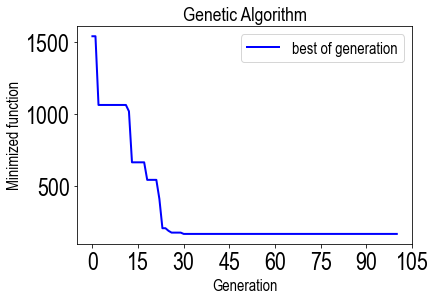

best_decomp_energy =  0.061638021488444855
best_PV_SLME =  0.08327693249427037
best_band_gap =  2.0114003249301287
best_perovs_alloy =  [' Rb_0.17 Cs_0.52 MA_0.03 FA_0.25 Ca_0.06 Sr_0.05 Ba_0.19 Ge_0.11 Sn_0.09 Pb_0.48 Cl_0.70 Br_0.75 I_1.50 ']

 Average time of function evaluating (secs): 0.01747033166885376

                                                                                                                                                                                                        
 The best found solution:
 [ 0.  2. 38.  0. 21.  1.  4.  4. 19.  4. 30. 16. 21. 28.]

 Objective function:
 124.91922087406367

 Used generations: 101
 Used time: 136 seconds


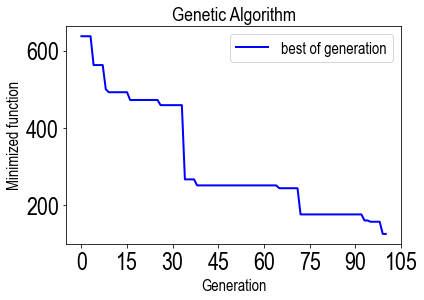

best_decomp_energy =  -0.004881200280891202
best_PV_SLME =  0.08077912593632924
best_band_gap =  1.8056236509050374
best_perovs_alloy =  [' Rb_0.03 Cs_0.59 FA_0.33 Ca_0.02 Sr_0.06 Ba_0.06 Ge_0.30 Sn_0.06 Pb_0.47 Cl_0.75 Br_0.98 I_1.31 ']

 Average time of function evaluating (secs): 0.017144939661026003

                                                                                                                                                                                                        
 The best found solution:
 [ 8.  2. 23. 11. 20.  9.  2.  2.  4.  5. 42.  2. 47. 16.]

 Objective function:
 46.763660496793115

 Used generations: 101
 Used time: 136 seconds


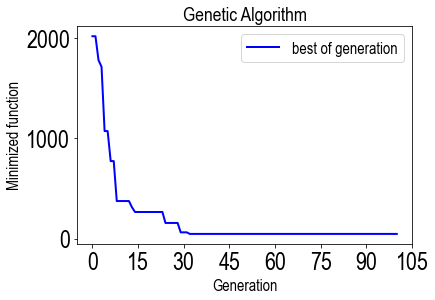

best_decomp_energy =  -0.1983069343604148
best_PV_SLME =  0.11133950320688403
best_band_gap =  1.6229759743259167
best_perovs_alloy =  [' K_0.12 Rb_0.03 Cs_0.36 MA_0.17 FA_0.31 Ca_0.14 Sr_0.03 Ba_0.03 Ge_0.06 Sn_0.08 Pb_0.66 Cl_0.09 Br_2.20 I_0.75 ']

 Average time of function evaluating (secs): 0.01699472188949585

                                                                                                                                                                                                        
 The best found solution:
 [16.  2. 15. 20. 11.  2.  0. 12.  1. 47.  2.  8. 48.  8.]

 Objective function:
 -0.13759014861618893

 Used generations: 101
 Used time: 135 seconds


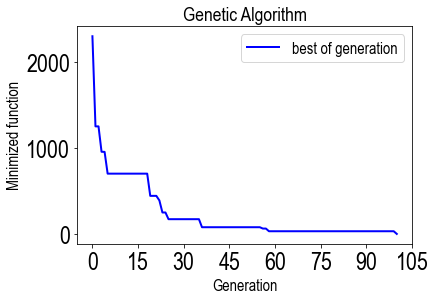

best_decomp_energy =  -0.08622234540698781
best_PV_SLME =  0.13759014861618893
best_band_gap =  1.7619393750786143
best_perovs_alloy =  [' K_0.25 Rb_0.03 Cs_0.23 MA_0.31 FA_0.17 Ca_0.03 Ba_0.19 Ge_0.02 Sn_0.73 Pb_0.03 Cl_0.38 Br_2.25 I_0.38 ']

 Average time of function evaluating (secs): 0.017205081939697265

                                                                                                                                                                                                        
 The best found solution:
 [31.  8.  8.  2. 15.  0.  1.  9. 13.  0. 41. 11. 46.  6.]

 Objective function:
 61.34479081243308

 Used generations: 101
 Used time: 132 seconds


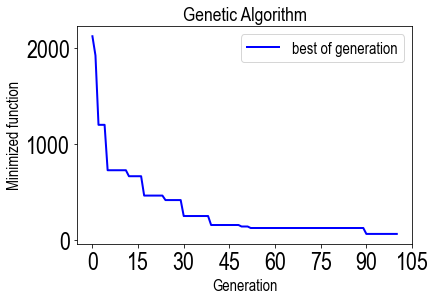

best_decomp_energy =  0.014586953199489803
best_PV_SLME =  0.11716238705672571
best_band_gap =  1.8829853911945458
best_perovs_alloy =  [' K_0.48 Rb_0.12 Cs_0.12 MA_0.03 FA_0.23 Sr_0.02 Ba_0.14 Ge_0.20 Pb_0.64 Cl_0.52 Br_2.16 I_0.28 ']

 Average time of function evaluating (secs): 0.017068453311920168

                                                                                                                                                                                                        
 The best found solution:
 [ 5.  2. 48.  6.  2.  1.  0.  1.  8. 17. 36. 14. 13. 37.]

 Objective function:
 78.25614423359697

 Used generations: 101
 Used time: 134 seconds


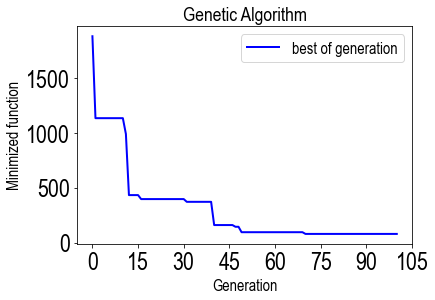

best_decomp_energy =  0.04709887418627584
best_PV_SLME =  0.09272995267888337
best_band_gap =  1.6481371476873823
best_perovs_alloy =  [' K_0.08 Rb_0.03 Cs_0.75 MA_0.09 FA_0.03 Ca_0.02 Ba_0.02 Ge_0.12 Sn_0.27 Pb_0.56 Cl_0.66 Br_0.61 I_1.73 ']

 Average time of function evaluating (secs): 0.01708956480026245

                                                                                                                                                                                                        
 The best found solution:
 [ 3. 11. 49.  1.  0.  8.  1.  2.  3. 35. 14.  2. 55.  7.]

 Objective function:
 15.540856230935962

 Used generations: 101
 Used time: 134 seconds


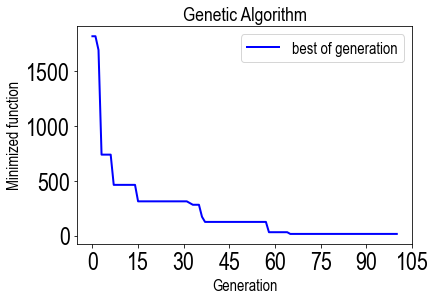

best_decomp_energy =  -0.17574201133137657
best_PV_SLME =  0.08414376906403835
best_band_gap =  1.764475880191687
best_perovs_alloy =  [' K_0.05 Rb_0.17 Cs_0.77 MA_0.02 Ca_0.12 Sr_0.02 Ba_0.03 Ge_0.05 Sn_0.55 Pb_0.22 Cl_0.09 Br_2.58 I_0.33 ']

 Average time of function evaluating (secs): 0.01695506238937378

                                                                                                                                                                                                        
 The best found solution:
 [ 3.  0. 26.  7. 29.  0.  1.  5.  5.  8. 47.  2. 62.  0.]

 Objective function:
 46.74285261715815

 Used generations: 101
 Used time: 132 seconds


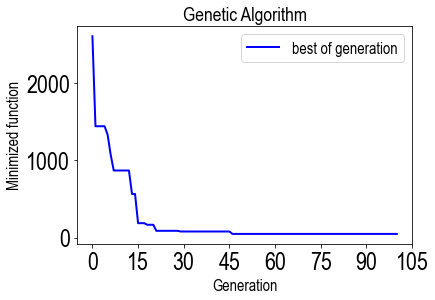

best_decomp_energy =  -0.38461845453905447
best_PV_SLME =  0.13214738284185334
best_band_gap =  1.8263891545418085
best_perovs_alloy =  [' K_0.05 Cs_0.41 MA_0.11 FA_0.45 Sr_0.02 Ba_0.08 Ge_0.08 Sn_0.12 Pb_0.73 Cl_0.09 Br_2.91 ']

 Average time of function evaluating (secs): 0.017242147207260132

                                                                                                                                                                                                        
 The best found solution:
 [12. 11. 26.  5. 10. 11.  1.  2.  0. 17. 32.  0. 50. 14.]

 Objective function:
 15.551919714818826

 Used generations: 101
 Used time: 134 seconds


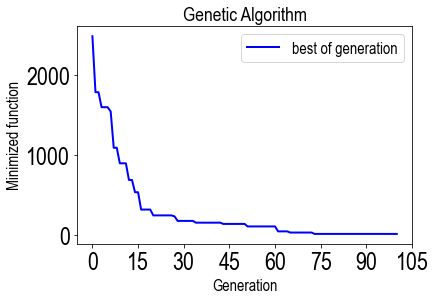

best_decomp_energy =  -0.02878068075689768
best_PV_SLME =  0.07308028518117311
best_band_gap =  1.77491194361566
best_perovs_alloy =  [' K_0.19 Rb_0.17 Cs_0.41 MA_0.08 FA_0.16 Ca_0.17 Sr_0.02 Ba_0.03 Sn_0.27 Pb_0.50 Br_2.34 I_0.66 ']

 Average time of function evaluating (secs): 0.01727772331237793

                                                                                                                                                                                                        
 The best found solution:
 [ 9.  3. 15.  4. 37.  3.  4.  4.  6. 35. 11.  9. 17. 38.]

 Objective function:
 148.21151458530824

 Used generations: 101
 Used time: 133 seconds


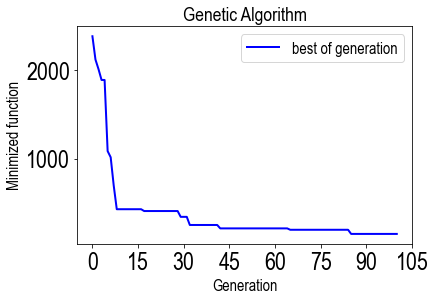

best_decomp_energy =  -0.025869284733464663
best_PV_SLME =  0.07400701331248244
best_band_gap =  2.0701605215986207
best_perovs_alloy =  [' K_0.14 Rb_0.05 Cs_0.23 MA_0.06 FA_0.58 Ca_0.05 Sr_0.06 Ba_0.06 Ge_0.09 Sn_0.55 Pb_0.17 Cl_0.42 Br_0.80 I_1.78 ']


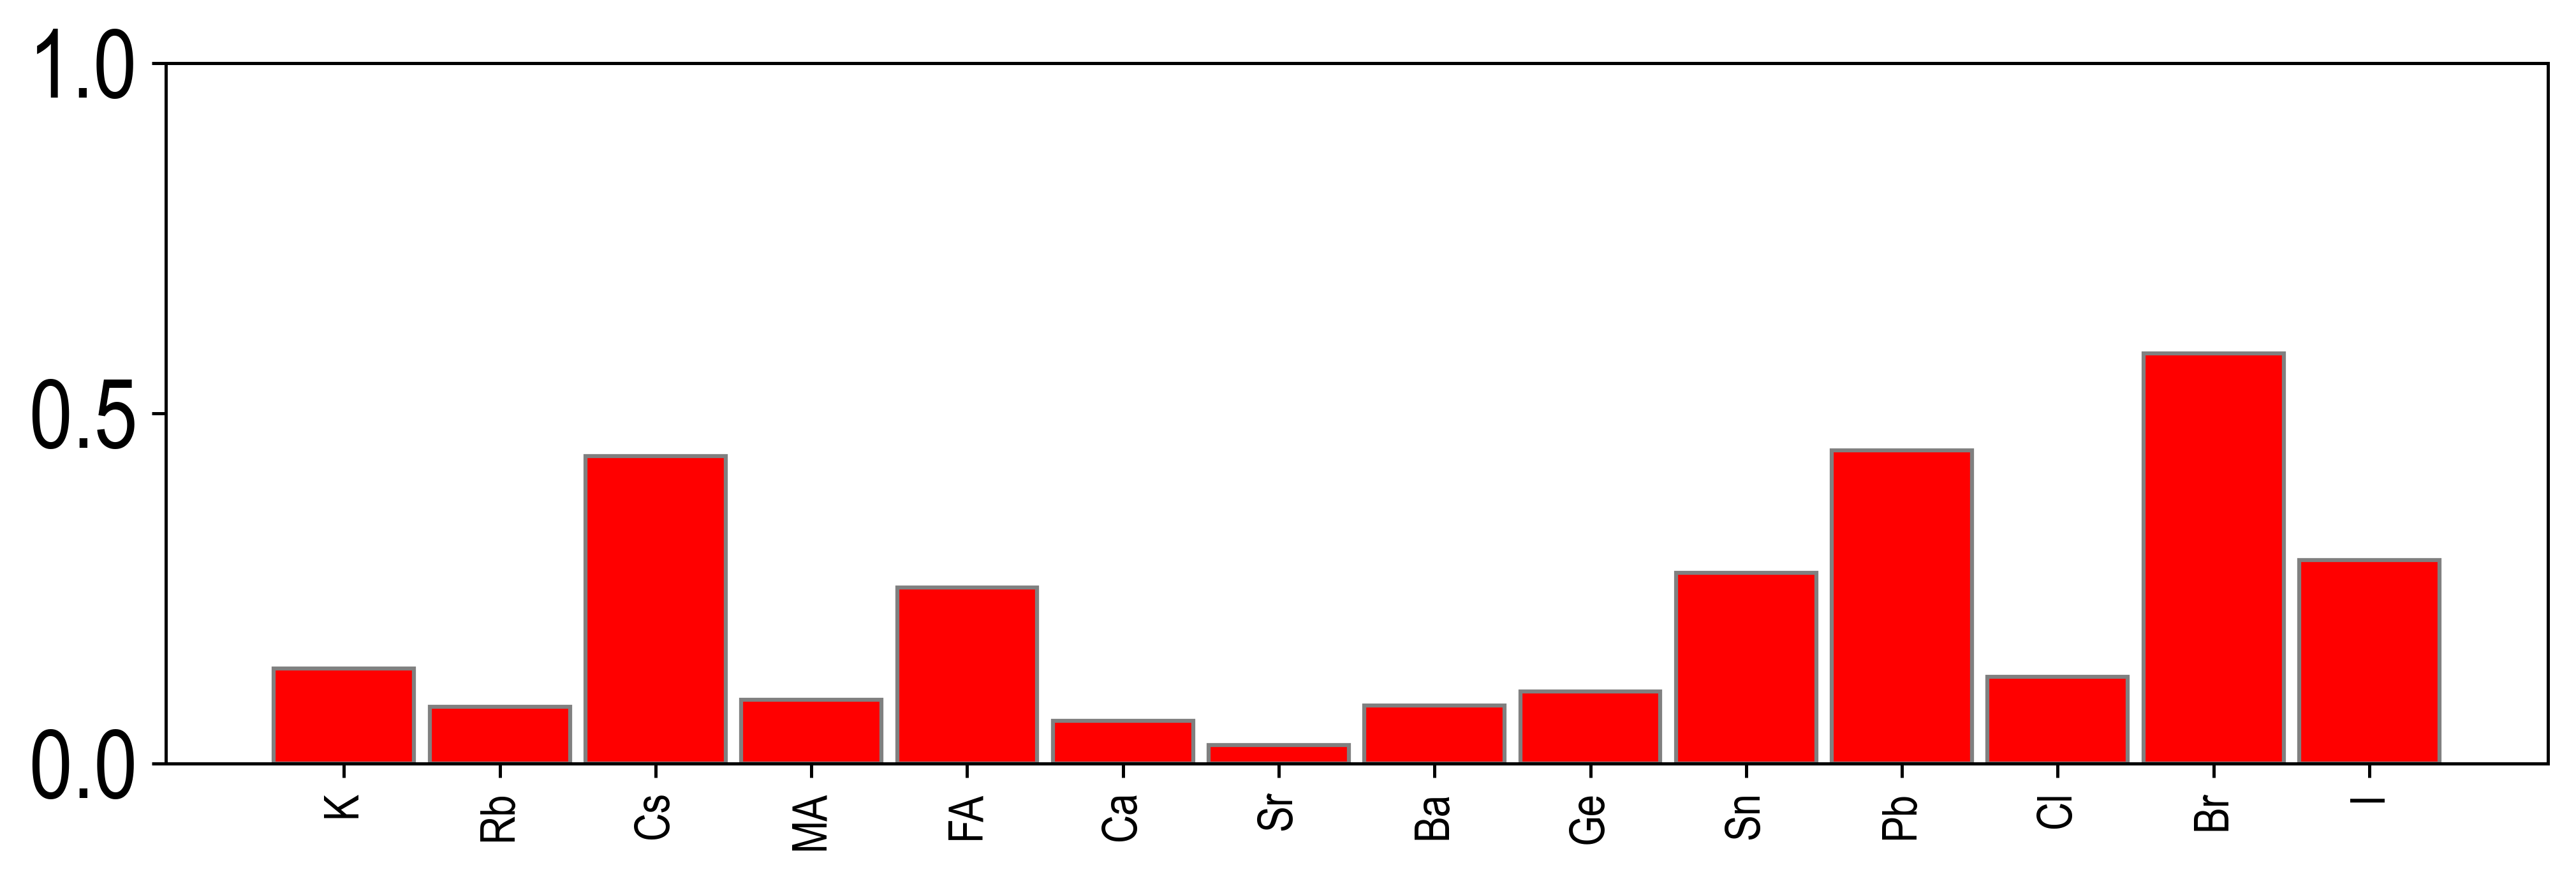

In [ ]:
times = 10

pred_prop = ['s']*times
pred_comp = ['s']*times
sc_frac = ['s']*times
X_b = [0.0]*14
X_best = [[0.0 for a in range(times)] for b in range(14)]

for i in range(0,times):
    pred_prop[i], pred_comp[i], sc_frac[i], X_b = GA()
    for j in range(0,14):
        X_best[j][i] = X_b[j]

text_file = open("pred_prop.txt", "w")
for i in range(0,times):
    text_file.write("Predicted properties: %s" % pred_prop[i] + '\n')
text_file.close()

text_file = open("pred_comp.txt", "w")
for i in range(0,times):
    text_file.write("Compounds: %s" % pred_comp[i] + '\n')
text_file.close()

text_file = open("supercell_fractions.txt", "w")
for i in range(0,times):
    text_file.write("Fractions out of 64: %s" % sc_frac[i] + '\n')
text_file.close()


aa = [0.0]*14
bb = [0.0]*14
for i in range(0,11):
    aa[i] = i
    for j in range(0,times):
        bb[i] = bb[i] + X_best[i][j]
    bb[i] = bb[i]/times
for i in range(11,14):
    aa[i] = i
    for j in range(0,times):
        bb[i] = bb[i] + X_best[i][j]/3
    bb[i] = bb[i]/times
#plt.scatter(aa, bb)


fig=plt.figure(figsize=(10,4),dpi=450)
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='Arial narrow')
plt.subplots_adjust(left=0.21, right=1.04, top=0.85, bottom=0.24, wspace=0.2, hspace=0.2)

ax = plt.plot(plotposition[0])
plt.plot(plotposition[0])
plt.xscale(scale[0])
plt.yscale(scale[0])
#plt.xlim([0,m])
plt.ylim([0,1])

xx = [0.0]*14
for i in range(0,14):
    xx[i] = i
Labels = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb', 'Cl', 'Br', 'I']

plt.xticks(xx[:], Labels[:], rotation=90, fontsize=12)
#plt.title('...', fontname='Arial narrow', size=24, horizontalalignment='center', pad=15)
plt.bar(aa, bb, color ='r', width = 0.9, edgecolor ='grey', align='center')

plt.savefig('GA_fracs.pdf', dpi=450)


In [ ]:
pred_prop[0]

'best_decomp_energy = 0.19576582420952915  best_PV_SLME = 0.13169065038680522  best_perovs_alloy = 1.956811948764418'